Кобзарь О.С. Хабибуллин Р.А. 

Проверить: вычисления общей теплоемкости $С_{pn}$, массового расхода $w$, градиент скорости, итоговый коэффициент Джоуля - Томпсона

# Расчет основных параметров многофазного потока 

Для расчета свойств потока при определенных T и P предварительно необходимо пересчитать PVT свойства флюидов

Объемные расходы фаз, замеренные на поверхности, принимаем равными замерам при н.у.

Если известен только дебит по жидкости и обводненность при н.у.:

$$ q_{o_{н.у.}} = q_{L_{н.у.}} * (1 - f_{w_{н.у.}}) $$ 

$$ q_{w_{н.у.}} = q_{L_{н.у.}} * f_{w_{н.у.}} $$ 

$$ q_{г_{н.у.}} =  q_{o_{н.у.}} * ГФ $$ 

и принимаем, что весь газ выделился из нефти: 

$$ ГФ = R_{sb} $$


Объемные дебиты нефти, воды, жидкости и газа в пластовых условиях:

$$q_o = q_{o_{н.у.}} B_o$$

$$q_w = q_{w_{н.у.}} B_w$$

$$q_g = (q_{g_{н.у.}} - q_{o_{н.у.}}R_{s}- q_{w_{н.у.}}R_{sw} ) B_g$$

$$q_L = q_o + q_w$$

Объемное содержание жидкости при отсутсвии проскальзывания:

$$\lambda_L = \frac{q_L}{q_L + q_g}$$

Уровень обводненности по дебитам фаз в условиях пласта:

$$f_w = \frac{q_w}{q_w + q_o}$$

$$f_o = 1- f_w$$

Поперечное сечение трубы:

$$A_p = \frac{\pi d^2}{4}$$

Приведенные скорости жидкости и газа:

$$v_{SL} = \frac{q_L}{A_p}$$

$$v_{Sg} = \frac{q_g}{A_p}$$

Общая скорость смеси:

$$v_{m} = \frac{q_L + q_g}{A_p} = v_{SL} + v_{Sg}$$

Свойства флюидов, выраженные аддитивно, без проскальзывания воды и нефти

$$\rho_L = \rho_o (1 - f_w) + \rho_w f_w$$

$$\sigma_L = \sigma_o (1 - f_w) + \sigma_w f_w$$

$$\mu_L = \mu_o (1 - f_w) + \mu_w f_w$$

$$c_{pL} = c_{po} (1 - f_w) + c_{pw} f_w$$

$$k_{L} = k_{o} (1 - f_w) + k_{w} f_w$$

Свойства газожидкостной смеси без проскальзывания жидкости и газа:

$$\mu_n = \mu_L \lambda_L + \mu_g ( 1 - \lambda_L)$$

$$\rho_n = \rho_L \lambda_L + \rho_g ( 1 - \lambda_L)$$

$$c_{pn} = C_{pL} \lambda_L + c_{pg} ( 1 - \lambda_L)$$

$$k_{n} = k_{L} \lambda_L + k_{g} ( 1 - \lambda_L)$$

Однако, некоторые формулы, для определения свойств ГЖС без учета проскальзывания, имеют другую форму в некоторых гидравлических корреляциях. 

Стоит отметить, что истинное содержание жидкости в потоке $H_L$ с учетом проскальзывания фаз может быть вычислено с помощью гидравлических корреляций и механистических моделей. Поэтому истинные свойства ГЖС будут выражаться похожими формулами при применении истинного содержания жидкости в потоке  $H_L$ вместо $\lambda_L$.

$$\rho_s = \rho_L H_L + \rho_g ( 1 - H_L)$$

Массовые расходные характеристики:

* Массовый расход ГЖС:

$$ w = \rho_n  v_m  A_p $$

* Массовая доля газа в потоке ГЖС

$$ X = \frac{\rho_g  v_{Sg} A_p}{w}  $$

* Массовая доля воды в потоке жидкости

$$ x_w = \frac{q_w \rho_w}{q_w \rho_w + q_o \rho_o} $$ 

Также тут же могут быть вычислены безразмерные комплексы для ГЖС:

* Безразмерное число Рейнольдса

$$ Re_n = \frac{\rho_n v_m d}{\mu_n} $$

* Безразмерное число Прандтля

$$ Pr_n = \frac{\mu_n C_{pn}}{k_n} $$


# Коэффициент Джоуля-Томпсона

Вследствие адиабатического расширения жидкостей и газов при прохождении через пористые среды и влияния дроссельного процесса наблюдаются термические эффекты. Адиабатическое расширение жидкостей и газов, сопровождающееся понижением температуры, незначительно влияет на температурные изменения внутри пласта и забоев действующих скважин вследствие большой теплоемкости системы $c_p$ (горных пород). Заметные изменения температуры на забоях скважин происходят вследствие дроссельного процесса . При этом интенсивность изменения температуры характеризуется коэффициентом Джоуля-Томсона, который представляет собой частную производную от температуры $Т$ флюида по давлению $р$ при постоянной энтальпии $H$. Таким образом к-т Джоуля –Томсона зависит от состава флюида, температуры и давления.[[Источник]][Ссылка №1]

$$ C_J = (\frac{dT}{dP})_H$$

Для жидкостей:

* Коэффициент термического расширения: 

$$ \beta = \frac{1}{V} (\frac{\partial V}{\partial T})_p = - \frac{1}{\rho} (\frac{\partial \rho}{\partial T})_p $$

где: 

$$ V = \frac{1}{\rho}$$

* Произведение коэффициента Джоуля Томпсона на изобарную теплоемкость

$$c_p C_J = - V (1 - T \beta)$$

Чтобы оценить $\beta$ требуется выражения для плотности жидкости (нефти или воды) как функции от температуры или два значения плотности жидкости при немного разных температурах при постоянном давлении.

Упрощенный вариант расчета:

$$ \beta_o = \frac{1}{\rho_{w_{P,T}}} (\frac{\rho_{o_{P,T + \delta T}} - \rho_{o_{P,T - \delta T}}}{2 \delta T}) $$

$$ \beta_w = \frac{1}{\rho_{w_{P,T}}} (\frac{\rho_{w_{P,T + \delta T}} - \rho_{w_{P,T - \delta T}}}{2 \delta T}) $$

$$(c_p C_J)_L = (c_p C_J)_o (1 -  x_w) + (c_p C_J)_w *  x_w$$

Для реальных газов:

Воспользуемся уравнением состояния реального газа:

$$c_p C_J = \frac{T}{Z \rho_g}(\frac{\partial Z}{\partial T})_p$$

Аналогичное упрощение:

$$(\frac{\partial Z}{\partial T})_p = (\frac{Z_{{P,T + \delta T}} - Z_{{P,T - \delta T}}}{2 \delta T})$$

[Ссылка №1]: http://gintel.ru/wp-content/uploads/Media/CasedHole/Downloads/PLOG_PLT_T1.pdf

Для ГЖС:

$$(c_p C_J)_n = (c_p C_J)_g X + (c_p C_J)_L * (1 - X)$$

Итоговый коэффициент Джоуля Томпсона:

$$ C_J = \frac {(c_p C_J)_n}{c_{pn}}$$

# Градиент скорости

Для расчета градиента температуры необходимо вычислеть значение градиента скорости. Аналогично коэффициенту Джоуля Томпсона упрощенный расчет градиента скорости по давлению имеет вид

$$\frac{dv_m}{dP} = (\frac{v_{m_{P + \delta P,T}} - v_{m_{P - \delta P,T}}}{2 \delta P})_T$$

И после расчета градиента давления по гидравлической корреляции можно вычислить градиент скорости

$$\frac{dv_m}{dz} = \frac{dv_m}{dP} * \frac{dP}{dz} $$

In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
%matplotlib inline

import uniflocpy.uTools.data_workflow as tool
import uniflocpy.uTools.uconst as uc

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

init_notebook_mode(connected=True)

In [2]:
rsb_m3m3_example = 100
fluid_example = PVT.FluidStanding( rsb_m3m3= rsb_m3m3_example)
multiphase_flow_example = PVT.FluidFlow(fluid=fluid_example )

In [3]:
p_bar = 200
t_c = 50
multiphase_flow_example.calc(p_bar, t_c)

In [4]:
multiphase_flow_example.__dict__

{'fl': <uniflocpy.uPVT.PVT_fluids.FluidStanding at 0x24290b68438>,
 'qliq_on_surface_m3day': 100,
 'fw_on_surface_perc': 20,
 'd_m': 0.152,
 'p_bar': 200,
 't_c': 50,
 'qoil_on_surface_m3day': 80.0,
 'qwat_on_surface_m3day': 20.0,
 'qgas_on_surface_m3day': 8000.0,
 'Ap_m2': 0.018145839167134643,
 'qoil_m3day': 100.00141210995578,
 'qwat_m3day': 20.307956746902516,
 'qgas_m3day': 0.0,
 'qliq_m3day': 120.3093688568583,
 'vsl_msec': 0.07673767711313068,
 'vsg_msec': 0.0,
 'vm_msec': 0.07673767711313068,
 'liquid_content': 1.0,
 'fw_perc': 16.879779970473056,
 'rho_liq_kgm3': 790.6702868516516,
 'sigma_liq_Nm': 0.011013127471092315,
 'mu_liq_cP': 0.5172172685963685,
 'heatcap_liq_jkgc': 2367.2435077277864,
 'thermal_conduct_liq_wmk': 0.21907891051494377,
 'heatcapn_jkgc': 2367.2435077277864,
 'thermal_conductn_wmk': 0.21907891051494377,
 'mass_flowraten_kgsec': 1.1009842961226075,
 'mun_cP': 0.5172172685963685,
 'rhon_kgm3': 790.6702868516516,
 'number_re_n': 17830.9564251095,
 'number_pr_

In [5]:
#multiphase_flow_example.fl.__dict__

In [6]:
def show_example(legend, title, xlabel, ylabel):
    plt.grid(True)
    plt.title(title, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xlabel(xlabel, color='black')
    plt.legend(legend)
    plt.show()

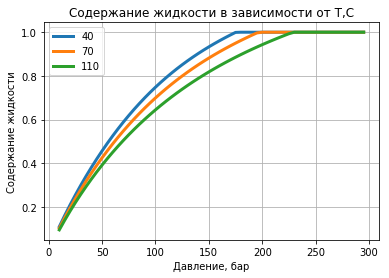

In [7]:
list_p_bar = np.arange(10,300,5)
list_t_c = [40,70,110]
liquid_content1, liquid_content2, liquid_content3 = [], [] , [] 

for i in list_p_bar:
    multiphase_flow_example.calc(i, list_t_c[0])
    liquid_content1.append(multiphase_flow_example.liquid_content)
    multiphase_flow_example.calc(i, list_t_c[1])
    liquid_content2.append(multiphase_flow_example.liquid_content)
    multiphase_flow_example.calc(i, list_t_c[2])
    liquid_content3.append(multiphase_flow_example.liquid_content) 

plt.plot(list_p_bar, liquid_content1, linewidth=3)
plt.plot(list_p_bar, liquid_content2, linewidth=3)
plt.plot(list_p_bar, liquid_content3, linewidth=3)

labels = (str(list_t_c[0]), str(list_t_c[1]), str(list_t_c[2]) )
show_example(labels,'Содержание жидкости в зависимости от Т,С', 
             'Давление, бар', 'Содержание жидкости' )

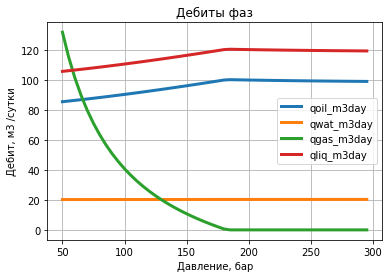

In [8]:
list_p_bar = np.arange(50,300,5)
list_t_c = np.arange(50,100,20)
qoil_m3day, qwat_m3day, qgas_m3day, qliq_m3day = [], [] , [] , []

for i in list_p_bar:
    multiphase_flow_example.calc(i, t_c)
    qoil_m3day.append(multiphase_flow_example.qoil_m3day)
    qwat_m3day.append(multiphase_flow_example.qwat_m3day)
    qgas_m3day.append(multiphase_flow_example.qgas_m3day) 
    qliq_m3day.append(multiphase_flow_example.qliq_m3day)

plt.plot(list_p_bar, qoil_m3day, linewidth=3)
plt.plot(list_p_bar, qwat_m3day, linewidth=3)
plt.plot(list_p_bar, qgas_m3day, linewidth=3)
plt.plot(list_p_bar, qliq_m3day, linewidth=3)
labels = ('qoil_m3day','qwat_m3day', 'qgas_m3day', 'qliq_m3day' )
show_example(labels,'Дебиты фаз', 
             'Давление, бар', 'Дебит, м3 /сутки' )

In [9]:
def plot(title_plot = '', title_axis_y = '', title_axis_x = ''):
    layout = dict(title =  title_plot,  yaxis=dict(title=title_axis_y) , xaxis=dict(title=title_axis_x))
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='basic-scatter')

def trace(data, number_param_y):
    tracep = go.Scattergl(
        x = data.p_list,
        y = data.get_values(number_param_y),
        name = data.get_name(number_param_y),
        mode = 'markers'
    )
    return tracep

In [10]:
multiphase_flow_data = tool.Data()
fluid_data = tool.Data()

In [11]:
multiphase_flow_data.clear_data()
fluid_data.clear_data()
for i in range(1,300):
    multiphase_flow_example.calc(i, t_c)
    
    multiphase_flow_data.get_data(multiphase_flow_example)
    fluid_data.get_data(multiphase_flow_example.fl)
    
    fluid_data.p_list.append(i)
    fluid_data.t_list.append(t_c)
    multiphase_flow_data.p_list.append(i)
    multiphase_flow_data.t_list.append(t_c)

In [12]:
multiphase_flow_data.print_all_names()

Номер 0 для получения параметра fl
Номер 1 для получения параметра qliq_on_surface_m3day
Номер 2 для получения параметра fw_on_surface_perc
Номер 3 для получения параметра d_m
Номер 4 для получения параметра p_bar
Номер 5 для получения параметра t_c
Номер 6 для получения параметра qoil_on_surface_m3day
Номер 7 для получения параметра qwat_on_surface_m3day
Номер 8 для получения параметра qgas_on_surface_m3day
Номер 9 для получения параметра Ap_m2
Номер 10 для получения параметра qoil_m3day
Номер 11 для получения параметра qwat_m3day
Номер 12 для получения параметра qgas_m3day
Номер 13 для получения параметра qliq_m3day
Номер 14 для получения параметра vsl_msec
Номер 15 для получения параметра vsg_msec
Номер 16 для получения параметра vm_msec
Номер 17 для получения параметра liquid_content
Номер 18 для получения параметра fw_perc
Номер 19 для получения параметра rho_liq_kgm3
Номер 20 для получения параметра sigma_liq_Nm
Номер 21 для получения параметра mu_liq_cP
Номер 22 для получения па

In [13]:
JT_cpa = multiphase_flow_data.get_values(33)

np_JT_cpa = np.asarray(JT_cpa)

np_JT_cmpa = np_JT_cpa * 10**6

p = multiphase_flow_data.p_list

In [14]:
tracep = go.Scattergl(
    x = multiphase_flow_data.p_list,
    y = np_JT_cmpa,
    name = 'np_JT_cmpa',
    mode = 'markers'
)

data = [tracep]

plot('Коэффициент Джоуля Томпсона', '$ C_J ,C/MPa $', 'p, bar')

In [21]:
trace1 = trace(multiphase_flow_data, 10)
trace2 = trace(multiphase_flow_data, 11)
trace3 = trace(multiphase_flow_data, 12)
trace4 = trace(multiphase_flow_data, 13)
data = [trace1, trace2, trace3, trace4]

plot('Объемные расходы фаз')

In [16]:
trace1 = trace(multiphase_flow_data, 26)

data = [trace1]

plot('Массовый расход смеси')

In [17]:
fluid_data.print_all_names()

Номер 0 для получения параметра gamma_gas
Номер 1 для получения параметра gamma_oil
Номер 2 для получения параметра gamma_wat
Номер 3 для получения параметра rsb_m3m3
Номер 4 для получения параметра gamma_gassp
Номер 5 для получения параметра y_h2s
Номер 6 для получения параметра y_co2
Номер 7 для получения параметра y_n2
Номер 8 для получения параметра s_ppm
Номер 9 для получения параметра par_wat
Номер 10 для получения параметра p_bar
Номер 11 для получения параметра t_c
Номер 12 для получения параметра pbcal_bar
Номер 13 для получения параметра tpb_C
Номер 14 для получения параметра bobcal_m3m3
Номер 15 для получения параметра muobcal_cP
Номер 16 для получения параметра _pb_bar
Номер 17 для получения параметра _bob_m3m3
Номер 18 для получения параметра _muob_cP
Номер 19 для получения параметра _mu_oil_cP
Номер 20 для получения параметра _mu_gas_cP
Номер 21 для получения параметра _mu_wat_cP
Номер 22 для получения параметра _mu_deadoil_cP
Номер 23 для получения параметра _rho_oil_kgm

In [20]:
trace1 = trace(multiphase_flow_data, 22)
trace2 = trace(multiphase_flow_data, 24)
trace3 = trace(fluid_data, 35)
trace4 = trace(fluid_data, 36)
trace5 = trace(fluid_data, 37)
data = [trace1, trace2, trace3, trace4, trace5]

plot('Теплоемкости', 'cp, Дж/кгС','p, bar')